In [1]:
import numpy
import matplotlib.pyplot as plt
import math
import json
import collections

In [2]:
def Parse(ll):
    paxoslist = []
    networklist = []
    totaltimeList = []
    for item in ll:
        totaltime = item[0]
        paxostime = item[1]
        networktime = item[2]

        paxoslist.append(paxostime)
        networklist.append(networktime)
        totaltimeList.append(totaltime)

    return paxoslist, networklist, totaltimeList


def Average(l, n):
    averagedList = []

    for i in range(0, len(l), n):
        chunk = l[i:i + n]
        avofchunk = sum(chunk)/len(chunk)
        averagedList.append(avofchunk)	

    # print averagedList
    return averagedList

def calculateTPS(averageTotalTime):
    no_of_clients = 201
    return no_of_clients*(1000/averageTotalTime[0])

def averageDataFromFile(file_name, chunk):
    f = open(file_name, "r")
    data = json.loads(f.read())
    # print data
    chunksize = int(len(data)/chunk)
    paxoslist, networklist, totaltimeList = Parse(data)	
    avPaxosList = Average(paxoslist, chunksize)
    avNetworkList = Average(networklist, chunksize)
    avtotalTimeList = Average(totaltimeList, chunksize)
    return avPaxosList, avNetworkList, avtotalTimeList

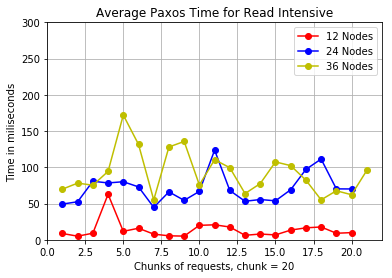

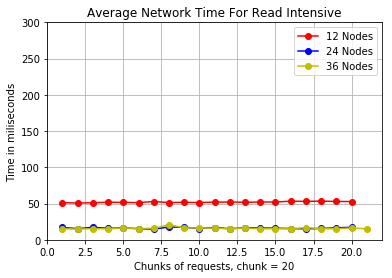

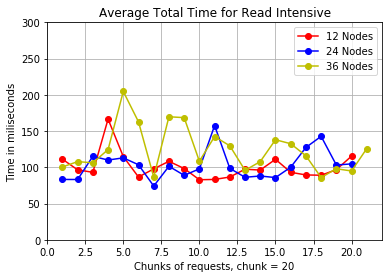

In [3]:
CHUNK_SIZE = 20
a, b, c = averageDataFromFile("/Users/ankurrastogi/sbu_work/FCN/FCN-Project/Data/12nodes/read int/data1000.json", CHUNK_SIZE)
d, e, f = averageDataFromFile("/Users/ankurrastogi/sbu_work/FCN/FCN-Project/Data/24bknodes/read/data.json", CHUNK_SIZE)
g, h, i = averageDataFromFile("/Users/ankurrastogi/sbu_work/FCN/FCN-Project/Data/36nodes/read/data.json", CHUNK_SIZE)

# print(c, calculateTPS(c))
# print(f, calculateTPS(f))
# print(i, calculateTPS(i))

plt.plot(range(1,len(a)+1),[abs(i) for i in a], color='r', label = '12 Nodes', marker="o")
plt.plot(range(1,len(d)+1),[abs(i) for i in d], color='b', label = '24 Nodes', marker="o")
plt.plot(range(1,len(g)+1),[abs(i) for i in g], color='y', label = '36 Nodes', marker="o")
plt.ylim(0,300)
plt.title("Average Paxos Time for Read Intensive")
plt.xlabel("Chunks of requests, chunk = " + str(CHUNK_SIZE))
plt.ylabel("Time in miliseconds")
plt.grid()
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig("Read1.png", dpi=100)

plt.plot(range(1,len(b)+1),b, color='r', label = '12 Nodes', marker="o")
plt.plot(range(1,len(e)+1),e, color='b', label = '24 Nodes', marker="o")
plt.plot(range(1,len(h)+1),h, color='y', label = '36 Nodes', marker="o")
plt.ylim(0,300)
plt.title("Average Network Time For Read Intensive")
plt.xlabel("Chunks of requests, chunk = " + str(CHUNK_SIZE))
plt.ylabel("Time in miliseconds")
plt.grid()
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig("Read2.png", dpi=100)

plt.plot(range(1,len(c)+1),c, color='r', label = '12 Nodes', marker="o")
plt.plot(range(1,len(f)+1),f, color='b', label = '24 Nodes', marker="o")
plt.plot(range(1,len(i)+1),i, color='y', label = '36 Nodes', marker="o")
plt.ylim(0,300)
plt.title("Average Total Time for Read Intensive")
plt.xlabel("Chunks of requests, chunk = " + str(CHUNK_SIZE))
plt.ylabel("Time in miliseconds")
plt.grid()
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig("Read3.png", dpi=100)

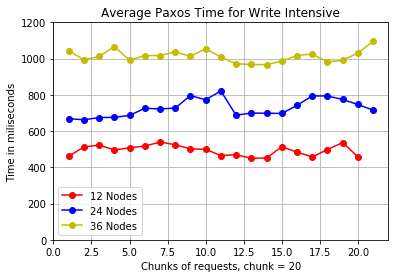

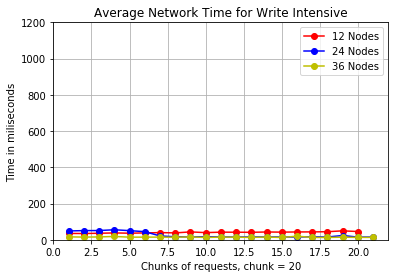

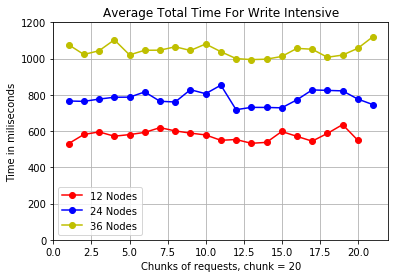

In [4]:
CHUNK_SIZE = 20
a, b, c = averageDataFromFile("/Users/ankurrastogi/sbu_work/FCN/FCN-Project/Data/12nodes/write int/data.json", CHUNK_SIZE)
d, e, f = averageDataFromFile("/Users/ankurrastogi/sbu_work/FCN/FCN-Project/Data/24bknodes/write/data.json", CHUNK_SIZE)
g, h, i = averageDataFromFile("/Users/ankurrastogi/sbu_work/FCN/FCN-Project/Data/36nodes/write/data.json", CHUNK_SIZE)

# print(c, calculateTPS(c))
# print(f, calculateTPS(f))
# print(i, calculateTPS(i))

plt.plot(range(1,len(a)+1),a, color='r', label = '12 Nodes', marker="o")
plt.plot(range(1,len(d)+1),d, color='b', label = '24 Nodes', marker="o")
plt.plot(range(1,len(g)+1),g, color='y', label = '36 Nodes', marker="o")
plt.ylim(0,1200)
plt.title("Average Paxos Time for Write Intensive")
plt.xlabel("Chunks of requests, chunk = " + str(CHUNK_SIZE))
plt.ylabel("Time in miliseconds")
plt.grid()
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig("Write1.png", dpi=100)

plt.plot(range(1,len(b)+1),b, color='r', label = '12 Nodes', marker="o")
plt.plot(range(1,len(e)+1),e, color='b', label = '24 Nodes', marker="o")
plt.plot(range(1,len(h)+1),h, color='y', label = '36 Nodes', marker="o")
plt.ylim(0,1200)
plt.title("Average Network Time for Write Intensive")
plt.xlabel("Chunks of requests, chunk = " + str(CHUNK_SIZE))
plt.ylabel("Time in miliseconds")
plt.grid()
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig("Write2.png", dpi=100)

plt.plot(range(1,len(c)+1),c, color='r', label = '12 Nodes', marker="o")
plt.plot(range(1,len(f)+1),f, color='b', label = '24 Nodes', marker="o")
plt.plot(range(1,len(i)+1),i, color='y', label = '36 Nodes', marker="o")
plt.ylim(0,1200)
plt.title("Average Total Time For Write Intensive")
plt.xlabel("Chunks of requests, chunk = " + str(CHUNK_SIZE))
plt.ylabel("Time in miliseconds")
plt.grid()
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig("Write3.png", dpi=100)

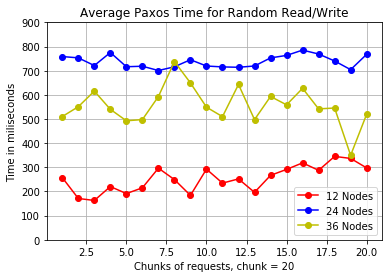

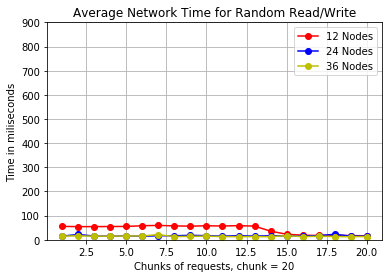

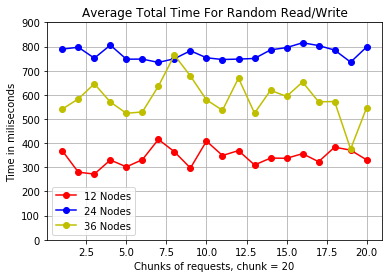

In [5]:
CHUNK_SIZE = 20
a, b, c = averageDataFromFile("/Users/ankurrastogi/sbu_work/FCN/FCN-Project/Data/12nodes/mixed pickle/data1000.json", CHUNK_SIZE)
d, e, f = averageDataFromFile("/Users/ankurrastogi/sbu_work/FCN/FCN-Project/Data/24bknodes/mix/data.json", CHUNK_SIZE)
g, h, i = averageDataFromFile("/Users/ankurrastogi/sbu_work/FCN/FCN-Project/Data/36nodes/mix/data.json", CHUNK_SIZE)

# print(c, calculateTPS(c))
# print(f, calculateTPS(f))
# print(i, calculateTPS(i))

plt.plot(range(1,len(a)+1),a, color='r', label = '12 Nodes', marker="o")
plt.plot(range(1,len(d)+1),d, color='b', label = '24 Nodes', marker="o")
plt.plot(range(1,len(g)+1),g, color='y', label = '36 Nodes', marker="o")
plt.ylim(0,900)
plt.title("Average Paxos Time for Random Read/Write")
plt.xlabel("Chunks of requests, chunk = " + str(CHUNK_SIZE))
plt.ylabel("Time in miliseconds")
plt.grid()
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig("Mix1.png", dpi=100)

plt.plot(range(1,len(b)+1),b, color='r', label = '12 Nodes', marker="o")
plt.plot(range(1,len(e)+1),e, color='b', label = '24 Nodes', marker="o")
plt.plot(range(1,len(h)+1),h, color='y', label = '36 Nodes', marker="o")
plt.ylim(0,900)
plt.title("Average Network Time for Random Read/Write")
plt.xlabel("Chunks of requests, chunk = " + str(CHUNK_SIZE))
plt.ylabel("Time in miliseconds")
plt.grid()
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig("Mix2.png", dpi=100)

plt.plot(range(1,len(c)+1),c, color='r', label = '12 Nodes', marker="o")
plt.plot(range(1,len(f)+1),f, color='b', label = '24 Nodes', marker="o")
plt.plot(range(1,len(i)+1),i, color='y', label = '36 Nodes', marker="o")
plt.ylim(0,900)
plt.title("Average Total Time For Random Read/Write")
plt.xlabel("Chunks of requests, chunk = " + str(CHUNK_SIZE))
plt.ylabel("Time in miliseconds")
plt.grid()
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig("Mix3.png", dpi=100)



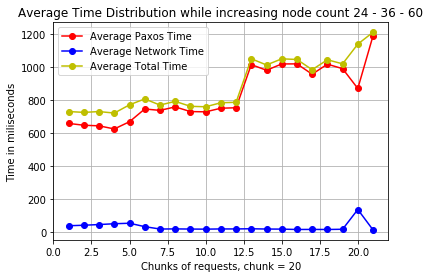

In [6]:
CHUNK_SIZE = 20
a, b, c = averageDataFromFile("/Users/ankurrastogi/sbu_work/FCN/FCN-Project/Data/total/data.json", CHUNK_SIZE)

plt.plot(range(1,len(a)+1),a, color='r', label = 'Average Paxos Time', marker="o")
plt.plot(range(1,len(b)+1),b, color='b', label = 'Average Network Time', marker="o")
plt.plot(range(1,len(c)+1),c, color='y', label = 'Average Total Time', marker="o")

plt.title("Average Time Distribution while increasing node count 24 - 36 - 60")
plt.xlabel("Chunks of requests, chunk = " + str(CHUNK_SIZE))
plt.ylabel("Time in miliseconds")
plt.grid()
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig("node_change.png", dpi=100)

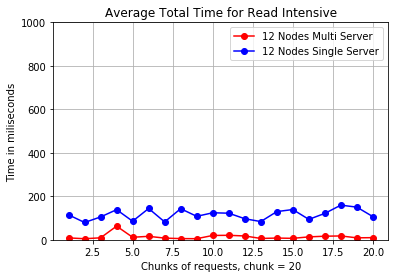

In [7]:
CHUNK_SIZE = 20
a, b, c = averageDataFromFile("/Users/ankurrastogi/sbu_work/FCN/FCN-Project/Data/12nodes/read int/data1000.json", CHUNK_SIZE)
d, e, f = averageDataFromFile("/Users/ankurrastogi/sbu_work/FCN/FCN-Project/Data/single-12-node/single_new_read_output.json", CHUNK_SIZE)

# plt.plot(range(1,len(a)+1),[abs(i) for i in a], color='r', label = '12 Nodes Multi Server', marker="o")
# plt.plot(range(1,len(d)+1),d, color='b', label = '12 Nodes Single Server', marker="o")
# plt.ylim(0,300)
# plt.title("Average Paxos Time for Read Intensive")
# plt.xlabel("Chunks of requests, chunk = " + str(CHUNK_SIZE))
# plt.ylabel("Time in miliseconds")
# plt.grid()
# plt.legend()
# fig1 = plt.gcf()
# plt.show()
# fig1.savefig("Single-Multi1.png", dpi=100)

# plt.plot(range(1,len(b)+1),[abs(i) for i in a], color='r', label = '12 Nodes Multi Server', marker="o")
# plt.plot(range(1,len(e)+1),d, color='b', label = '12 Nodes Single Server', marker="o")
# plt.ylim(0,300)
# plt.title("Average Network Time for Read Intensive")
# plt.xlabel("Chunks of requests, chunk = " + str(CHUNK_SIZE))
# plt.ylabel("Time in miliseconds")
# plt.grid()
# plt.legend()
# fig1 = plt.gcf()
# plt.show()
# fig1.savefig("Single-Multi2.png", dpi=100)

plt.plot(range(1,len(c)+1),[abs(i) for i in a], color='r', label = '12 Nodes Multi Server', marker="o")
plt.plot(range(1,len(f)+1),d, color='b', label = '12 Nodes Single Server', marker="o")
plt.ylim(0,1000)
plt.title("Average Total Time for Read Intensive")
plt.xlabel("Chunks of requests, chunk = " + str(CHUNK_SIZE))
plt.ylabel("Time in miliseconds")
plt.grid()
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig("Single-Read-Multi3.png", dpi=100)

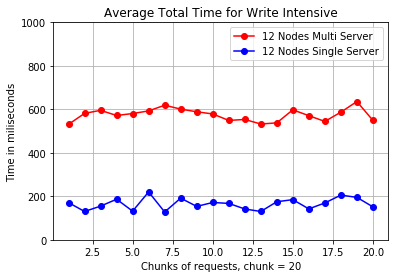

In [8]:
CHUNK_SIZE = 20
a, b, c = averageDataFromFile("/Users/ankurrastogi/sbu_work/FCN/FCN-Project/Data/12nodes/write int/data.json", CHUNK_SIZE)
d, e, f = averageDataFromFile("/Users/ankurrastogi/sbu_work/FCN/FCN-Project/Data/single-12-node/single_new_read_output.json", CHUNK_SIZE)

# print(a,b,c)

# plt.plot(range(1,len(a)+1),a, color='r', label = '12 Nodes Multi Server', marker="o")
# plt.plot(range(1,len(d)+1),d, color='b', label = '12 Nodes Single Server', marker="o")
# plt.ylim(0,300)
# plt.title("Average Paxos Time for Read Intensive")
# plt.xlabel("Chunks of requests, chunk = " + str(CHUNK_SIZE))
# plt.ylabel("Time in miliseconds")
# plt.grid()
# plt.legend()
# fig1 = plt.gcf()
# plt.show()
# fig1.savefig("Single-Multi1.png", dpi=100)

# plt.plot(range(1,len(b)+1),a, color='r', label = '12 Nodes Multi Server', marker="o")
# plt.plot(range(1,len(e)+1),d, color='b', label = '12 Nodes Single Server', marker="o")
# plt.ylim(0,300)
# plt.title("Average Network Time for Read Intensive")
# plt.xlabel("Chunks of requests, chunk = " + str(CHUNK_SIZE))
# plt.ylabel("Time in miliseconds")
# plt.grid()
# plt.legend()
# fig1 = plt.gcf()
# plt.show()
# fig1.savefig("Single-Multi2.png", dpi=100)

plt.plot(range(1,len(c)+1),c, color='r', label = '12 Nodes Multi Server', marker="o")
plt.plot(range(1,len(f)+1),f, color='b', label = '12 Nodes Single Server', marker="o")
plt.ylim(0,1000)
plt.title("Average Total Time for Write Intensive")
plt.xlabel("Chunks of requests, chunk = " + str(CHUNK_SIZE))
plt.ylabel("Time in miliseconds")
plt.grid()
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig("Single-Write-Multi3.png", dpi=100)

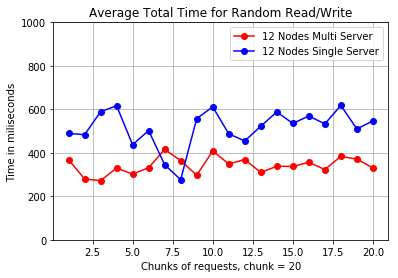

In [9]:
CHUNK_SIZE = 20
a, b, c = averageDataFromFile("/Users/ankurrastogi/sbu_work/FCN/FCN-Project/Data/12nodes/mixed pickle/data1000.json", CHUNK_SIZE)
d, e, f = averageDataFromFile("/Users/ankurrastogi/sbu_work/FCN/FCN-Project/Data/single-12-node/single_new_mix_output.json", CHUNK_SIZE)

# print(a,b,c)

# plt.plot(range(1,len(a)+1),a, color='r', label = '12 Nodes Multi Server', marker="o")
# plt.plot(range(1,len(d)+1),d, color='b', label = '12 Nodes Single Server', marker="o")
# plt.ylim(0,300)
# plt.title("Average Paxos Time for Read Intensive")
# plt.xlabel("Chunks of requests, chunk = " + str(CHUNK_SIZE))
# plt.ylabel("Time in miliseconds")
# plt.grid()
# plt.legend()
# fig1 = plt.gcf()
# plt.show()
# fig1.savefig("Single-Multi1.png", dpi=100)

# plt.plot(range(1,len(b)+1),a, color='r', label = '12 Nodes Multi Server', marker="o")
# plt.plot(range(1,len(e)+1),d, color='b', label = '12 Nodes Single Server', marker="o")
# plt.ylim(0,300)
# plt.title("Average Network Time for Read Intensive")
# plt.xlabel("Chunks of requests, chunk = " + str(CHUNK_SIZE))
# plt.ylabel("Time in miliseconds")
# plt.grid()
# plt.legend()
# fig1 = plt.gcf()
# plt.show()
# fig1.savefig("Single-Multi2.png", dpi=100)

plt.plot(range(1,len(c)+1),c, color='r', label = '12 Nodes Multi Server', marker="o")
plt.plot(range(1,len(f)+1),f, color='b', label = '12 Nodes Single Server', marker="o")
plt.ylim(0,1000)
plt.title("Average Total Time for Random Read/Write")
plt.xlabel("Chunks of requests, chunk = " + str(CHUNK_SIZE))
plt.ylabel("Time in miliseconds")
plt.grid()
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig("Single-Mix-Multi3.png", dpi=100)